###What is a Perceptron?
 - A Perceptron is the simplest type of neural network, functioning as a binary classifier.
 - It mimics a biological neuron and forms the basic building block of more complex neural networks. The perceptron receives multiple input signals, processes them, and produces an output.

 Inputs are weighted and summed.
 A threshold is applied using an activation function.
If the weighted sum exceeds the threshold, the neuron "fires" (output is 1); otherwise, it doesn’t (output is 0).

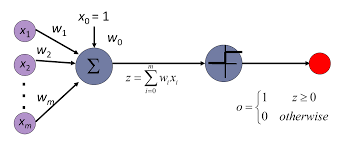

###Why is the Perceptron Important?
 - The perceptron forms the foundation for understanding more complex architectures in deep learning.

It introduced key concepts such as:

 - Weights: indicate the strength of connection
 - Bias: A term added to the weighted sum to allow flexibility in classification.
 - Activation function: An activation function in neural networks decides whether a neuron should be activated or not, helping the model learn complex patterns.Also set a range of Z (i.e., whether the output is 1 or 0).

###How Does a Perceptron Work?
 - Input Layer: Multiple inputs are given to the perceptron.
 - Weights: Each input has an associated weight that indicates its importance.
 - Weighted Sum: Multiply each input by its weight, then sum all the values.
 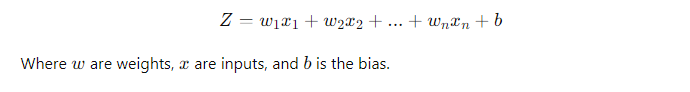
 - Activation Function: The weighted sum is passed through an activation function that produces the output. For a perceptron, this is usually a step function.

 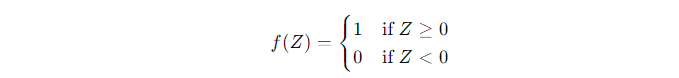
 - Output: The output is either 1 (positive class) or 0 (negative class).

###What Activation Function is Used?


 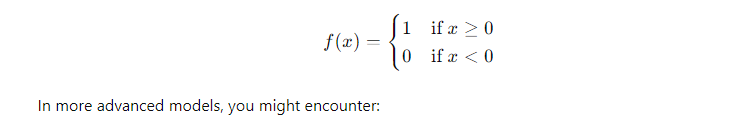

An activation function in a neural network helps determine if a neuron should be activated or not, simulating the firing of biological neurons. It introduces non-linearity into the output of a neuron, allowing the network to model complex data like images, videos, and audio.

Without activation functions, neural networks would be equivalent to linear models, making them ineffective in solving complex problems. These functions enable the model to learn and represent non-linear relationships.

###How to Train a Perceptron?

####Steps to Train a Perceptron

Ax1 + Bx2 + C = 0

 - Input: provide input with random A,B,C

 - Summation: The perceptron sums all the weighted inputs and adds a bias term to adjust the overall output.

 - Activation Function: The result from the summation is passed through an activation function (usually a step function) to produce a final binary output (e.g., 0 or 1, "yes" or "no").

 - Training: During training, the perceptron adjusts its weights based on the difference between the predicted output and the actual output (using an error calculation). This is done through an algorithm called Gradient Descent.

 - Repeat: The process is repeated until the perceptron classifies all the training data correctly or reaches a threshold of accuracy.



####Example: Classifying Weather as Sunny or Rainy

Let’s say you want to predict whether it will be sunny or rainy based on the temperature.

- Input: Temperature (e.g., 20°C, 25°C, 30°C).

- Weights: The perceptron assigns a weight to the input temperature (e.g., 0.5).

 - Summation: For a temperature of 25°C, the sum might be:

   Summation = 25°𝐶 × 0.5 + bias


 - Activation Function: If the sum is above a certain threshold (let's say 15), the perceptron will predict "Sunny" (output = 1), otherwise "Rainy" (output = 0).

 - Learning: If the prediction is wrong, the perceptron will adjust the weights slightly and try again.



###How to Identify Positive and Negative Regions?
 - The perceptron divides the input space into two regions using a hyperplane.

 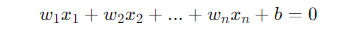

 - The hyperplane represents the decision boundary. Inputs on one side of the plane are classified as positive (1), while those on the other side are classified as negative (0).

   - Positive Region: Inputs that result in Z≥0.
   - Negative Region: Inputs that result in Z<0.

###Transformation of the Line (Decision Boundary)
In a 2D space, the perceptron’s decision boundary is a straight line. As you update the weights and bias during training, this line rotates, shifts, and changes orientation until it correctly separates the positive and negative classes.

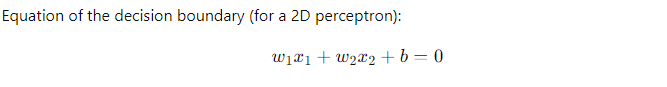

  - If
𝑤
1
w
1
​
  or
𝑤
2
w
2
​
  is changed, the slope of the line changes.
  - If
𝑏
b is changed, the line shifts up or down.

# CODE

###Step 1: Import Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt

###Step 2: Define the Perceptron Class

In [17]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)


###Step 3: Generate Sample Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Step 4: Train the Perceptron Model

In [20]:
model = Perceptron(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)


###Step 5: Evaluate the Model

In [21]:
predictions = model.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%
